# Recommendation Systems

##### Objective:
Build a recommendation system to recommend products to customers based on the their previous ratings for other products.

##### Steps followed:
Install the required package
Load the required libraries
Load the dataset and assign the column names
Analyze the dataset
Take subset of the dataset
Build Popularity based model
Build Collaborative filtering model
Tune the parameters
Compare and conclude the best model

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from surprise import Reader
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split # # Import Surprise package's data splitting function
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic
from surprise import KNNWithMeans

In [3]:
df = pd.read_csv("/Users/chiragsinghchaudhary/Downloads/ratings_Beauty.csv")
df.head(30)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
5,AKJHHD5VEH7VG,0762451459,5.0,1404518400
6,A1BG8QW55XHN6U,1304139212,5.0,1371945600
7,A22VW0P4VZHDE3,1304139220,5.0,1373068800
8,A3V3RE4132GKRO,130414089X,5.0,1401840000
9,A327B0I7CYTEJC,130414643X,4.0,1389052800


In [4]:
df.shape

(2023070, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [6]:
df.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [7]:
df.isnull().values.any()

False

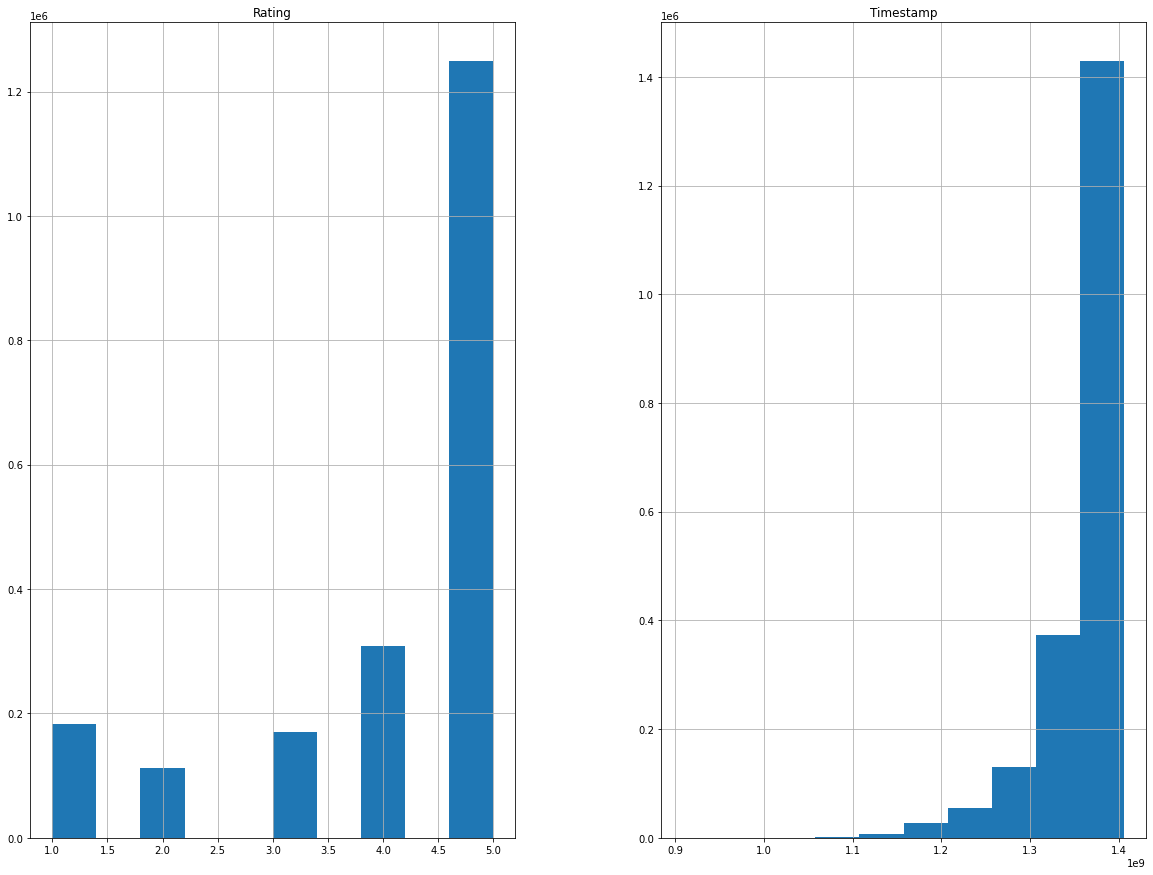

In [8]:
df.hist(figsize=(20, 15))
plt.show()

<AxesSubplot:ylabel='Rating'>

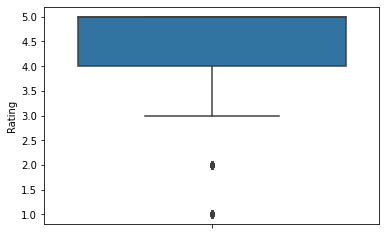

In [9]:
sns.boxplot(y='Rating',data=df)

<AxesSubplot:ylabel='Timestamp'>

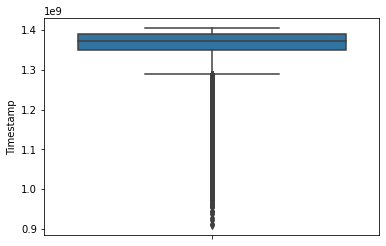

In [11]:
sns.boxplot(y='Timestamp',data=df)

In [13]:
counts=df['UserId'].value_counts()
df1=df[df['UserId'].isin(counts[counts>=50].index)]
df1.head(30)

,UserId,ProductId,Rating,Timestamp
5,AKJHHD5VEH7VG,0762451459,5.0,1404518400
42,A22ZFXQE8AWPEP,1304482596,1.0,1383177600
47,A22ZFXQE8AWPEP,1304482685,1.0,1383177600
52,A22ZFXQE8AWPEP,1304495396,1.0,1384992000
61,A22ZFXQE8AWPEP,1304511111,1.0,1384992000
66,A22ZFXQE8AWPEP,1304511138,1.0,1384992000
86,A22ZFXQE8AWPEP,1304622665,1.0,1386028800
87,A22ZFXQE8AWPEP,1304624498,1.0,1385683200
92,A22ZFXQE8AWPEP,1304651029,1.0,1386028800
102,A22ZFXQE8AWPEP,130466578X,1.0,1386028800


In [14]:
df1.shape

(29559, 4)

## Popularity based filtering based on Product's ratings

In [16]:
products_df = pd.DataFrame(df1.groupby('ProductId')['Rating'].mean())
products_df['product_rating_counts'] = pd.DataFrame(df1.groupby('ProductId')['Rating'].count())
products_df.head()

,Rating,product_rating_counts
ProductId,,
0762451459,5.0,1
1304482596,1.0,1
1304482685,1.0,1
1304495396,1.0,1
1304511111,1.0,1


In [17]:
products_df.sort_values('Rating', ascending=False).head()

,Rating,product_rating_counts
ProductId,,
0762451459,5.0,1
B004JAZGOC,5.0,1
B004ITB3IW,5.0,6
B004ITYX52,5.0,1
B004IVM0EG,5.0,1


In [18]:
products_df.sort_values('product_rating_counts', ascending=False).head()

,Rating,product_rating_counts
ProductId,,
B009FKNGGQ,3.816667,60
B00AE0790U,4.140351,57
B009FKNGRA,4.340426,47
B00AO4EBOI,4.152174,46
B008U2Y9BQ,4.108696,46


## Popularity based filtering based on User's ratings

In [19]:
users_df = pd.DataFrame(df1.groupby('UserId')['Rating'].mean())
users_df['user_rating_counts'] = pd.DataFrame(df1.groupby('UserId')['Rating'].count())
users_df.head()

,Rating,user_rating_counts
UserId,,
A100WO06OQR8BQ,3.592593,54
A1047EDJ84IMAS,4.317073,82
A10G136JEISLVR,3.426471,68
A10Y59HW4O47N0,4.711538,52
A110PQTEI6THU7,3.196429,56


In [20]:
users_df.sort_values('Rating', ascending=False).head()

,Rating,user_rating_counts
UserId,,
AJGU56YG8G1DQ,5.000000,130
AAEVYY0PHQUUL,5.000000,60
A135SX8ESCQV9B,5.000000,52
ALEW5AUKCRWHN,5.000000,55
A1Q1Z7IR79G52A,4.985507,69


In [21]:
users_df.sort_values('user_rating_counts', ascending=False).head()

,Rating,user_rating_counts
UserId,,
A3KEZLJ59C1JVH,3.704370,389
A281NPSIMI1C2R,4.791667,336
A3M174IC0VXOS2,4.414110,326
A2V5R832QCSOMX,4.417266,278
A3LJLRIZL38GG3,4.550725,276


## Collaborative based filtering and get the scores for different models

In [23]:
reader = Reader(rating_scale=(0.5,5))

data = Dataset.load_from_df(df1[['UserId', 'ProductId', 'Rating']], reader)

# Use the famous SVD algorithm.
svd = SVD()

# Run 5-fold cross-validation and print results.

cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0319  1.0262  1.0342  1.0488  1.0556  1.0393  0.0110  
MAE (testset)     0.7816  0.7712  0.7865  0.7936  0.7971  0.7860  0.0092  
Fit time          2.11    2.14    2.13    2.09    2.13    2.12    0.02    
Test time         0.14    0.04    0.04    0.04    0.03    0.06    0.04    


{'test_rmse': array([1.03192021, 1.02616897, 1.03416446, 1.048789  , 1.05562476]),
 'test_mae': array([0.78164493, 0.77118382, 0.78645725, 0.79364648, 0.79709675]),
 'fit_time': (2.1100831031799316,
  2.1384949684143066,
  2.1268770694732666,
  2.0930941104888916,
  2.1296849250793457),
 'test_time': (0.13982081413269043,
  0.03537297248840332,
  0.035238027572631836,
  0.03656792640686035,
  0.0347599983215332)}

In [24]:
# Split the data into 70% / 30%
trainset, testset = train_test_split(data, test_size=.30)

# Run SVD algorithm
svd=SVD()

#Build the model
svd.fit(trainset)
predictions=svd.test(testset)

# Compute errors

accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 1.0522
MAE:  0.7893


0.7892556840487396

In [25]:
#Define userid and productid in the string format as required

uid=str(150)
pid=str(10000)

# Get predictions

pred=svd.predict(uid, pid, r_ui=4, verbose=True)

user: 150        item: 10000      r_ui = 4.00   est = 4.18   {'was_impossible': False}


In [26]:
param_grid = {
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

print(gs.best_score)
print(gs.best_params)

{'rmse': 1.048356358543856, 'mae': 0.8149643320039793}
{'rmse': {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}, 'mae': {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}}


In [27]:
# GridSearch with KNNbasic

param_grid = {'min_k':[2,3,4], 'k':[5,10,20] }
gs = GridSearchCV(KNNBasic, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

print(gs.best_score)
print(gs.best_params)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi